# 2. logistic_regression（逻辑回归）


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# import tensorflow as tf
from sklearn.metrics import classification_report#这个包是评价报告

In [6]:
data = pd.read_csv('ex2data1.txt', names=['parameter1', 'parameter2', 'admitted'])
data.head()

,parameter1,parameter2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,parameter1,paramter2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


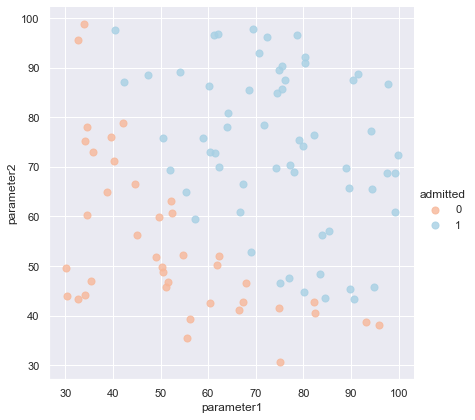

In [9]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))

sns.lmplot(x='parameter1', y='parameter2', hue='admitted', data=data, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()#看下数据的样子

In [11]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones,df],axis=1)
    
    return data.iloc[:,:-1].values

def get_y(df):
    return np.array(df.iloc[:,-1]) # 取 df 的最后一列

def normalize_feature(df):
    # apply(func): 将 func 这个函数应用于 dataFrame
    # mean(): 求平均值
    # std(): 求标准差 
    return df.apply(lambda column: (column - column.mean()) / column.std()) # 特征缩放

In [12]:
X = get_X(data)
print(X)

y = get_y(data)
print(y)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$ 
合起来，我们得到逻辑回归模型的假设函数： 
	${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

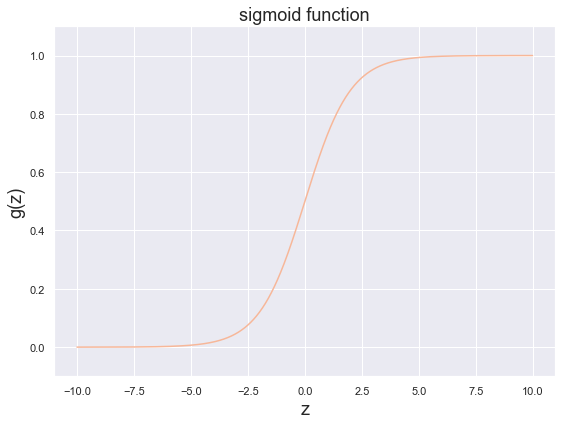

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# cost function(代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [20]:
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0.])

In [21]:
def cost(theta, X, y):
    return (1/len(X)) * (-y @ np.log(sigmoid( X @ theta)) - (1-y) @ np.log(1 - sigmoid(X @ theta)))

cost(theta, X, y)

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [22]:
def gradient(theta, X, y):
    return (1/len(X)) * X.T @ (sigmoid(X @ theta) - y)
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数
> * 使用 [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 去寻找参数  

scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

其中：
fun：目标函数，返回单值

x0：初始迭代值，

args：要输入到目标函数中的参数

method：求解的算法，目前可选的有

        ‘Nelder-Mead’
        ‘Powell’ 
        ‘CG’ 
        ‘BFGS’ 
        ‘Newton-CG’ 
        ‘L-BFGS-B’
        ‘TNC’
        ‘COBYLA’ 
        ‘SLSQP’ 
        ‘dogleg’ 
        ‘trust-ncg’ 
        以及在 version 0.14.0，还能自定义算法
        
jac：目标函数的雅可比矩阵。可选项，仅适用于CG，BFGS，Newton-CG，L-BFGS-B，TNC，SLSQP，dogleg，trust-ncg。如果jac是布尔值并且为True，则假定fun与目标函数一起返回梯度。如果为False，将以数字方式估计梯度。jac也可以返回目标的梯度。此时，它的参数必须与fun相同。

hess，hessp：可选项，目标函数的Hessian（二阶导数矩阵）或目标函数的Hessian乘以任意向量p。仅适用于Newton-CG，dogleg，trust-ncg。
bounds：可选项，变量的边界（仅适用于L-BFGS-B，TNC和SLSQP）。以（min，max）对的形式定义 x 中每个元素的边界。如果某个参数在 min 或者 max 的一个方向上没有边界，则用 None 标识。如（None, max）
constraints：约束条件（只对 COBYLA 和 SLSQP）。dict 类型。

    type : str， ‘eq’ 表示等于0，‘ineq’ 表示不小于0
    fun : 定义约束的目标函数
    jac : 函数的雅可比矩阵 (只用于 SLSQP)，可选项。
    args : fun 和 雅可比矩阵的入参，可选项。
tol：迭代停止的精度。

callback(xk)：每次迭代要回调的函数，需要有参数 xk

options：其他选项
    maxiter :  最大迭代次数
    disp :  是否显示过程信息
以上参数更具体的介绍见官网相关页面。

In [24]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X,y), method='Newton-CG', jac=gradient) # 返回 min cost 的结果
# x 是 theta 的最终参数
print(res)

     fun: 0.20349770176799842
     jac: array([8.81085635e-06, 5.77513048e-04, 5.58267837e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 29
    njev: 193
  status: 0
 success: True
       x: array([-25.16242925,   0.20624044,   0.2014805 ])


# 用训练集预测和验证

In [30]:
def predict(X, theta): # 预测 y 值
    pred = sigmoid(X @ theta)
    return (pred >= 0.5).astype(int)

In [32]:
final_theta = res.x
y_pred = predict(X, final_theta)

# 返回每个类的精度、召回率、F1 分数
print(classification_report(y, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 寻找决策边界

> $X \times \theta = 0$  (this is a linear)
> 
> 证明见 https://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier

In [37]:
coef = -(res.x / res.x[2])  # theta0 + theta1 * x1 + theta2 * x2 = 0
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1] * x # x2 = kx1 + d, k = -theta1/theta2 , d = -theta0/theta2

[124.88766481  -1.02362483  -1.        ]


In [38]:
data.describe() # find the range of x and y

,parameter1,parameter2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


> you know the intercept would be around 125 for both x and y

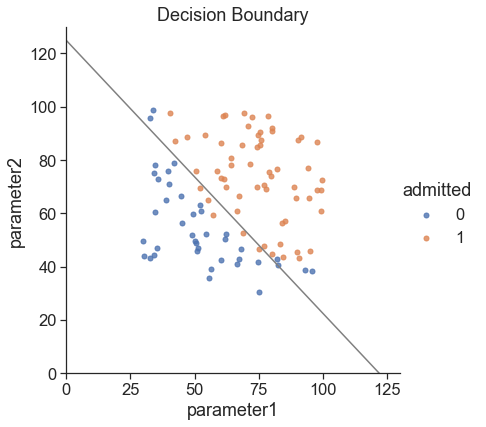

In [40]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot(x='parameter1', y='parameter2', hue='admitted', data=data, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

# 正则化逻辑回归

In [41]:
df = pd.read_csv('ex2data2.txt', names=['parameters1', 'parameters2', 'accepted'])
df.head()

,parameters1,parameters2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


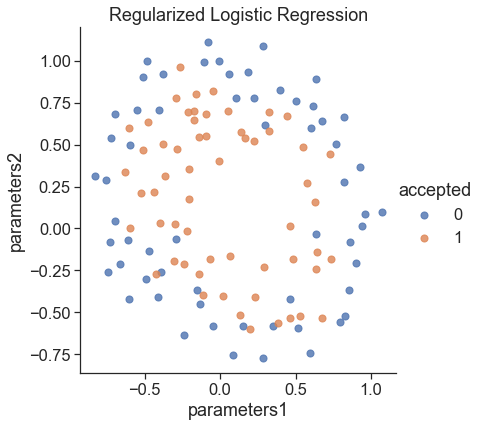

In [42]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot(x='parameters1', y='parameters2', hue='accepted', data=df, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

# feature mapping（特征映射）

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="../img/mapped_feature.png">

如果样本量多，逻辑回归问题很复杂，而原始特征只有x1,x2可以用多项式创建更多的特征x1、x2、x1x2、x1^2、x2^2、... X1^nX2^n。

因为更多的特征进行逻辑回归时，得到的分割线可以是任意高阶函数的形状。

In [54]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [51]:
x1 = np.array(df.parameters1)
x2 = np.array(df.parameters2)
print(x1.shape)
print(x2.shape)

data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118,)
(118,)
(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [52]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646563,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [59]:
theta = np.zeros(data.shape[1])
print(theta)
X = feature_mapping(x1, x2, power=6, as_ndarray=True)

y = get_y(df)
print(y.shape)

28
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(118,)


In [60]:
def regularized_cost(theta, X, y, l=1): # l 是 lamda 即正则化参数
    theta_new = theta[1:] # you don't penalize theta_0
    regularized_term = (l / (2 * len(X))) * np.power(theta_new , 2).sum()
    return cost(theta, X, y) + regularized_term

regularized_cost(theta, X, y)
# 结果与 cost 一样是因为假设的 theta 为0

0.6931471805599454

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [61]:
def gradient_regularized(theta, X, y, l=1):
    theta_new = theta[1:]
    regularized_theta = (l / len(X)) * theta_new
    
    # 将 theta_0 加入
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    
    return gradient(theta, X, y) + regularized_term

gradient_regularized(theta, X, y)
            

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# 拟合参数


In [64]:
import scipy.optimize as opt

print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X,y), method='Newton-CG',jac=gradient_regularized)
res

init cost = 0.6931471805599454


     fun: 0.5290027297127307
     jac: array([-1.02331192e-07,  1.16573581e-08, -1.13146499e-08, -5.93330905e-08,
        1.53518404e-08, -6.11006109e-10,  3.69153733e-08, -3.78360557e-08,
        5.91349666e-10,  1.37418341e-08, -8.99546470e-08, -1.57424741e-08,
       -6.48324154e-08,  5.57567212e-10, -1.90760313e-08,  1.60874750e-08,
       -2.11863353e-08, -2.18643583e-08, -2.08393162e-08,  1.19810268e-09,
        1.12326493e-08, -5.55427231e-08, -7.37101448e-09, -3.39415835e-08,
       -1.24524922e-08, -3.00944173e-08,  1.68739636e-09, -2.60310344e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 55
  status: 0
 success: True
       x: array([ 1.27273931,  0.62527071,  1.18108886, -2.01995872, -0.9174234 ,
       -1.4316643 ,  0.124007  , -0.36553405, -0.3572397 , -0.17513026,
       -1.45815722, -0.05098967, -0.61555642, -0.27470644, -1.19281693,
       -0.24218778, -0.20600596, -0.04473156, -0.27778467, -0.29537803,
       -0.4

## 预测

In [66]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# 使用不同的 $\lambda$ （这个是常数）
# 画出决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [75]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('ex2data2.txt', names=['parameters1', 'parameters2', 'accepted'])
    x1 = np.array(df.parameters1)
    x2 = np.array(df.parameters2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=gradient_regularized)
    final_theta = res.x

    return final_theta

In [69]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density) # 返回(-1, 1.5) 间隔为 density 的数据
    t2 = np.linspace(-1, 1.5, density)
    
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)
    
    inner_product = mapped_cord.values @ theta
    
    decision = mapped_cord[np.abs(inner_product) < threshhold]
    
    return decision.f10, decision.f01

In [80]:
def draw_boundary(power, l):
    
    
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot(x='test1', y='test2', hue='accepted', data=df, height=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='r', s=10)
    plt.title('Decision boundary')
    plt.show()

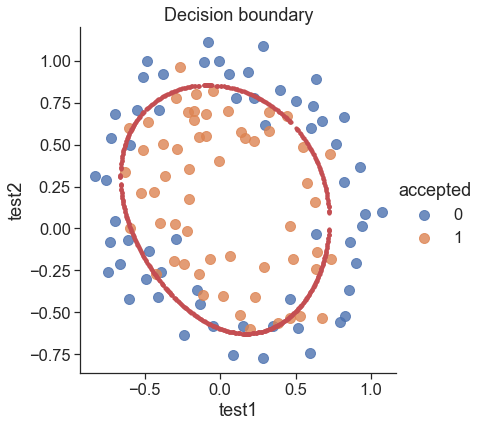

In [81]:
draw_boundary(power=3, l=1)

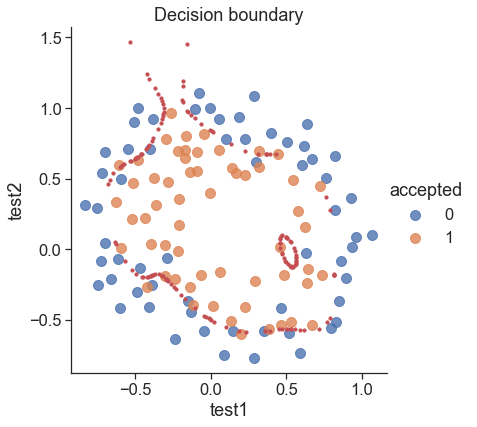

In [82]:
draw_boundary(power=6, l=0)  # no regularization, over fitting，#lambda=0,没有正则化，过拟合了

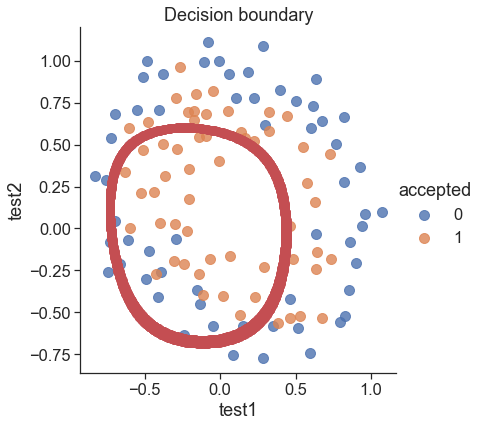

In [83]:
draw_boundary(power=6, l=100)  # underfitting，#lambda=100,欠拟合